In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## **1. 데이터 전처리**

In [ ]:
# 필요한 데이터 읽기
tb_order_04 = pd.read_csv('tb_order_202105.csv')
tb_order_05 = pd.read_csv('tb_order_202104.csv')
tb_order_04.head(10)
tb_order_04.shape
tb_order_05.head(10)
tb_order_05.shape

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,84536666,16,C09876770,89,98297032,2021-05-01 11:00,2021-05-01 11:23,0,32340,2
1,88276008,158,C68585017,98,7770950,2021-05-01 11:00,2021-05-01 11:27,0,38650,2
2,30853149,97,C47161470,20,70091383,2021-05-01 11:00,2021-05-01 11:51,0,28270,2
3,2266595,95,C61461123,22,42134845,2021-05-01 11:00,2021-05-01 11:39,0,23160,2
4,7086301,49,C01007474,99,69495399,2021-05-01 11:00,2021-05-01 11:37,0,19000,9
5,92005874,104,C00574154,80,58592863,2021-05-01 11:00,2021-05-01 11:59,0,46240,2
6,8243996,171,C79994479,28,16376941,2021-05-01 11:00,2021-05-01 11:43,0,20640,2
7,62015909,191,C41716522,69,77974780,2021-05-01 11:00,2021-05-01 11:54,0,27320,2
8,23354107,108,C04237650,26,18054006,2021-05-01 11:00,2021-05-01 11:50,0,29870,2
9,82121011,123,C95413238,22,11628886,2021-05-01 11:00,2021-05-01 11:10,0,27910,2


(241142, 10)

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2
5,86102793,167,C06298599,21,70395221,2021-04-01 11:00,2021-04-01 11:59,1,37420,1
6,49394078,187,C99985130,97,31854449,2021-04-01 11:00,2021-04-01 11:31,0,38650,9
7,10290387,30,C17281363,75,81945254,2021-04-01 11:00,2021-04-01 11:16,1,22380,1
8,54821099,9,C16681192,90,9773815,2021-04-01 11:00,2021-04-01 11:35,0,23080,2
9,42415936,156,C00944252,84,82103008,2021-04-01 11:00,2021-04-01 11:30,1,23120,1


(233262, 10)

### **1.1. 데이터 결합 (유니온) 하기**

In [ ]:
# 데이터 결합하기
tb_order_all = pd.concat([tb_order_04, tb_order_05])
tb_order_all.head()
tb_order_all.tail()
tb_order_all.shape

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,84536666,16,C09876770,89,98297032,2021-05-01 11:00,2021-05-01 11:23,0,32340,2
1,88276008,158,C68585017,98,7770950,2021-05-01 11:00,2021-05-01 11:27,0,38650,2
2,30853149,97,C47161470,20,70091383,2021-05-01 11:00,2021-05-01 11:51,0,28270,2
3,2266595,95,C61461123,22,42134845,2021-05-01 11:00,2021-05-01 11:39,0,23160,2
4,7086301,49,C01007474,99,69495399,2021-05-01 11:00,2021-05-01 11:37,0,19000,9


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
233257,61665702,103,C51797758,48,77989403,2021-04-30 21:58,2021-04-30 22:36,0,35300,2
233258,31151690,119,C04883863,78,16130893,2021-04-30 21:58,2021-04-30 22:35,0,32340,2
233259,15955692,175,C87594637,96,11457934,2021-04-30 21:58,2021-04-30 22:32,0,36170,9
233260,73251339,145,C93839111,92,64743537,2021-04-30 21:58,2021-04-30 22:46,0,36170,2
233261,42442108,117,C44570215,54,2304995,2021-04-30 21:58,2021-04-30 22:37,1,18990,1


(474404, 10)

In [ ]:
# 중복 제거 하기
tb_order_all.drop_duplicates(inplace = True)

In [ ]:
# index 초기화 하기 
tb_order_all.reset_index(drop = True, inplace = True)
tb_order_all.head()
tb_order_all.tail()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,84536666,16,C09876770,89,98297032,2021-05-01 11:00,2021-05-01 11:23,0,32340,2
1,88276008,158,C68585017,98,7770950,2021-05-01 11:00,2021-05-01 11:27,0,38650,2
2,30853149,97,C47161470,20,70091383,2021-05-01 11:00,2021-05-01 11:51,0,28270,2
3,2266595,95,C61461123,22,42134845,2021-05-01 11:00,2021-05-01 11:39,0,23160,2
4,7086301,49,C01007474,99,69495399,2021-05-01 11:00,2021-05-01 11:37,0,19000,9


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
474399,61665702,103,C51797758,48,77989403,2021-04-30 21:58,2021-04-30 22:36,0,35300,2
474400,31151690,119,C04883863,78,16130893,2021-04-30 21:58,2021-04-30 22:35,0,32340,2
474401,15955692,175,C87594637,96,11457934,2021-04-30 21:58,2021-04-30 22:32,0,36170,9
474402,73251339,145,C93839111,92,64743537,2021-04-30 21:58,2021-04-30 22:46,0,36170,2
474403,42442108,117,C44570215,54,2304995,2021-04-30 21:58,2021-04-30 22:37,1,18990,1


### **1.2. 데이터 결합(Left Join)하기**

In [ ]:
# 결합시킬 데이터 불러오기 
m_store = pd.read_csv('m_store.csv')
m_store.head()

# 왼쪽에 기준이 될 데이터 
tb_order_all.head()

,store_id,store_name,area_cd
0,1,삼일대로점,SL
1,2,세종대로점,SL
2,3,무교로점,SL
3,4,덕수궁길점,SL
4,5,서소문로점,SL


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,84536666,16,C09876770,89,98297032,2021-05-01 11:00,2021-05-01 11:23,0,32340,2
1,88276008,158,C68585017,98,7770950,2021-05-01 11:00,2021-05-01 11:27,0,38650,2
2,30853149,97,C47161470,20,70091383,2021-05-01 11:00,2021-05-01 11:51,0,28270,2
3,2266595,95,C61461123,22,42134845,2021-05-01 11:00,2021-05-01 11:39,0,23160,2
4,7086301,49,C01007474,99,69495399,2021-05-01 11:00,2021-05-01 11:37,0,19000,9


In [ ]:
# 데이터 결합 (Left Join)
# key 컬럼 : store_id
order_df = pd.merge(tb_order_all, m_store, on ='store_id', how = 'left')
order_df.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd
0,84536666,16,C09876770,89,98297032,2021-05-01 11:00,2021-05-01 11:23,0,32340,2,삼봉로점,SL
1,88276008,158,C68585017,98,7770950,2021-05-01 11:00,2021-05-01 11:27,0,38650,2,광산로점,GJ
2,30853149,97,C47161470,20,70091383,2021-05-01 11:00,2021-05-01 11:51,0,28270,2,연제로점,BS
3,2266595,95,C61461123,22,42134845,2021-05-01 11:00,2021-05-01 11:39,0,23160,2,중앙대로2점,BS
4,7086301,49,C01007474,99,69495399,2021-05-01 11:00,2021-05-01 11:37,0,19000,9,당산로2점,SL


### **1.3. 불필요한 데이터 제거하기**

In [ ]:
# store id가 999로 이상한 관측값이 포함되어있음
order_df.loc[order_df['store_id'] == 999 ]

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd
90,50767209,999,C42395124,54,38116855,2021-05-01 11:07,2021-05-01 11:19,0,39010,2,보수담당,SL
175,26751004,999,C04230773,54,87066848,2021-05-01 11:16,2021-05-01 11:37,1,36170,1,보수담당,SL
316,18731635,999,C15370333,81,27190641,2021-05-01 11:29,2021-05-01 11:40,0,22380,2,보수담당,SL
600,98869612,999,C25277075,57,63594481,2021-05-01 11:52,2021-05-01 12:08,0,19000,2,보수담당,SL
660,43767543,999,C59856612,34,1557883,2021-05-01 11:56,2021-05-01 12:20,0,21220,2,보수담당,SL
...,...,...,...,...,...,...,...,...,...,...,...,...
473027,52648993,999,C32819157,11,83445699,2021-04-30 20:03,2021-04-30 20:24,1,21120,9,보수담당,SL
473128,42384749,999,C32393381,57,86751718,2021-04-30 20:11,2021-04-30 20:28,0,39010,2,보수담당,SL
473660,40214811,999,C63457263,53,36022036,2021-04-30 20:55,2021-04-30 21:29,0,41440,2,보수담당,SL
473756,45683537,999,C94176361,98,38755489,2021-04-30 21:05,2021-04-30 21:29,0,27500,9,보수담당,SL


In [ ]:
# store id가 999인 관측값 제거
order_df = order_df.loc[order_df['store_id'] != 999 ]
order_df.loc[order_df['store_id'] == 999 ]

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd


## **2. 데이터 시각화**

### **2.1. 전체 매출액 분포 확인하기**

In [ ]:
import matplotlib.pyplot as plt
import os
plt.rc('font', family='NanumBarunGothic') 

(array([ 8801.,  8861.,     0.,     0.,     0., 40355., 37596., 64246.,
        19061., 54597., 36452., 31933., 22680., 34822., 10276., 28981.,
        19408.,  9153., 19044., 18652.,  6931.]),
 array([ 6980.        ,  9076.19047619, 11172.38095238, 13268.57142857,
        15364.76190476, 17460.95238095, 19557.14285714, 21653.33333333,
        23749.52380952, 25845.71428571, 27941.9047619 , 30038.0952381 ,
        32134.28571429, 34230.47619048, 36326.66666667, 38422.85714286,
        40519.04761905, 42615.23809524, 44711.42857143, 46807.61904762,
        48903.80952381, 51000.        ]),
 <a list of 21 Patch objects>)

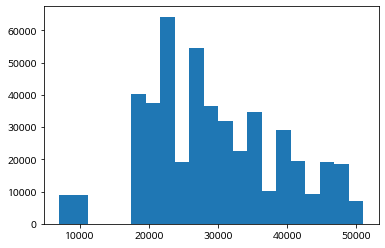

In [ ]:
plt.hist(order_df['total_amount'], bins = 21)

### **2.2. 자동 시각화**

In [ ]:
# 지역데이터 결합하기 
m_area   = pd.read_csv('m_area.csv')
order_df = pd.merge(order_df, m_area, on ='area_cd', how = 'left')
order_df.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area
0,84536666,16,C09876770,89,98297032,2021-05-01 11:00,2021-05-01 11:23,0,32340,2,삼봉로점,SL,서울,서울
1,88276008,158,C68585017,98,7770950,2021-05-01 11:00,2021-05-01 11:27,0,38650,2,광산로점,GJ,광주,광주
2,30853149,97,C47161470,20,70091383,2021-05-01 11:00,2021-05-01 11:51,0,28270,2,연제로점,BS,부산,부산
3,2266595,95,C61461123,22,42134845,2021-05-01 11:00,2021-05-01 11:39,0,23160,2,중앙대로2점,BS,부산,부산
4,7086301,49,C01007474,99,69495399,2021-05-01 11:00,2021-05-01 11:37,0,19000,9,당산로2점,SL,서울,서울


In [ ]:
pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 7.7 MB/s 
     |████████████████████████████████| 78 kB 9.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 30.1 MB/s 
     |████████████████████████████████| 749 kB 53.1 MB/s 
     |████████████████████████████████| 95 kB 4.8 MB/s 
     |████████████████████████████████| 50 kB 8.7 MB/s 
     |████████████████████████████████| 965 kB 56.1 MB/s 
     |████████████████████████████████| 133 kB 61.7 MB/s 
     |████████████████████████████████| 1.1 MB 36.9 MB/s 
     |████████████████████████████████| 435 kB 62.4 MB/s 
     |████████████████████████████████| 943 kB 48.1 MB/s 
     |████████████████████████████████| 144 kB 61.4 MB/s 
     |████████████████████████████████| 94 kB 5.0 MB/s 
     |████████████████████████

In [ ]:
from dataprep.eda import create_report

dat_x = order_df.drop('total_amount', axis = 1)
dat_y = order_df['total_amount']

x_report = create_report(dat_x) 
y_report = create_report(dat_y)

Computing series-max-agg-9293bf841708c9b6d588665abd7a121f:   0%|          | 0/244 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/dask/array/core.py:4613: RuntimeWarning: invalid value encountered in double_scalars
  result = function(*args, **kwargs)


In [ ]:
x_report ; x_report.save('x_report')